In [17]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#adding more dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6)
#print(june_temps)

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==6).all()
print(june_temps)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])

In [10]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
#print(june_df.to_string(index=False))
print(june_df.describe().to_string(index=True))

        June Temps
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


## D2: Determine the Summary Statistics for December

In [12]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12)
#print(dec_temps)

SELECT measurement.date AS measurement_date, measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE CAST(STRFTIME('%m', measurement.date) AS INTEGER) = ?


In [13]:
# 7. Convert the December temperatures to a list.
dec_temps = session.query(Measurement.date, Measurement.tobs).\
    filter(extract('month', Measurement.date)==12).all()
print(dec_temps)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [14]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=['date', 'Dec Temps'])

In [15]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
print(dec_df.describe().to_string(index=True))

         Dec Temps
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


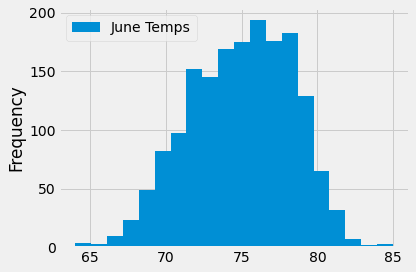

In [18]:
# June results to help visualize summary statistics
june_df.plot.hist(bins=20)
plt.tight_layout()

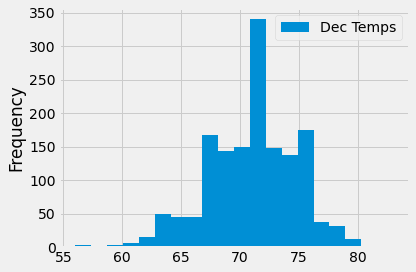

In [25]:
# December results to help visualize summary statistics
dec_df.plot.hist(bins=20)
plt.tight_layout()

In [20]:
june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()
#print(june_station)
june_station_df = pd.DataFrame(june_station, columns=['June Temps', 'Station'])
june_station_df


,June Temps,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [21]:
dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()
#print(dec_station)
dec_station_df = pd.DataFrame(dec_station, columns=['Dec Temps', 'Station'])
dec_station_df

,Dec Temps,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
...,...,...
1512,71.0,USC00516128
1513,71.0,USC00516128
1514,69.0,USC00516128
1515,65.0,USC00516128


In [32]:
station_temps = june_station_df.merge(dec_station_df, on="Station", how="inner").set_index("Station")
station_temps

,June Temps,Dec Temps
Station,,
USC00519397,78.0,76.0
USC00519397,78.0,74.0
USC00519397,78.0,74.0
USC00519397,78.0,64.0
USC00519397,78.0,64.0
...,...,...
USC00516128,75.0,71.0
USC00516128,75.0,71.0
USC00516128,75.0,69.0


In [31]:
june_stats = june_df.describe()
dec_stats = dec_df.describe()

summary_df = june_stats.merge(dec_stats, left_index=True, right_index=True)
summary_df

,June Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000
